In [1]:
%load_ext autoreload
%autoreload 2

from datetime import datetime, timedelta

import numpy as np
import pandas as pd
import xarray as xr

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cmocean

import sys

# path to own functions
sys.path.append('../../')

import data_OSISAF.icedrift_lr as OSIdrift


import data_UniBremen.SIC as UNISIC
import data_UniBremen.MultiYearIce as MYI

In [2]:
map_projection = ccrs.NorthPolarStereo(central_longitude=200.0, globe=None)



In [3]:
# dates = pd.date_range(datetime(2021, 12, 10), datetime(2022, 1, 13))
# dates = [datetime(2022, 1, 10), datetime(2022, 1, 13)]
# date = datetime(2013, 12, 31)


date = datetime(2003, 12, 31)

data = PPdrift.open_local_file(date, include_units=True)

True


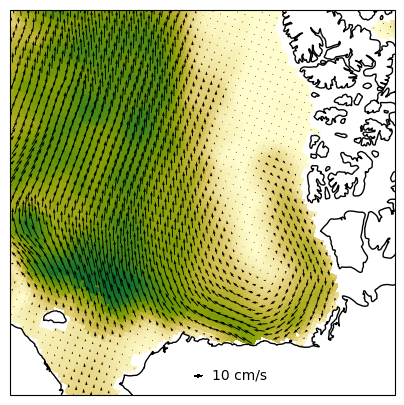

In [4]:
fig, ax = plt.subplots(figsize=(5,5), subplot_kw = {'projection': map_projection})
ax.coastlines()
ax.set_xlim(-1000000,1500000)
ax.set_ylim(-2500000,0)

# ax.set_xlim(-20000000,5000000)
# ax.set_ylim(500000,3000000)

speed = np.sqrt(data['u']**2 + data['v']**2)
ax.pcolormesh(data['xx'], data['yy'], speed, vmin=0, vmax=40, cmap=cmocean.cm.speed, transform=data['proj'])

sp = 2
q = ax.quiver(data['xx'][::sp,::sp], data['yy'][::sp,::sp], 
              data['u'][::sp,::sp], data['v'][::sp,::sp], scale_units='xy', scale=0.0002, transform=data['proj'])

ax.quiverkey(q, X=0.5, Y=0.05, U=10, label='10 cm/s', labelpos='E')

In [87]:
date = datetime(2013, 12, 31, 0, 0)

# date = datetime(2024, 1, 13, 0, 0)

# date = datetime(2019, 12, 11, 0, 0)

# date = datetime(2003, 12, 30, 0, 0)


data = {}

# ice velocity
# data['drift'] = OSIdrift.open_remote_file(date, include_units=False)
data['drift'] = PPdrift.open_local_file(date, include_units=True)

# MYI
# data['myi'] = MYI.open_remote_file(date, hem = 'n', method = 'urllib', quiet=True)

# SIC
data['sic'] = UNISIC.open_remote_file(date, res = '6250', hem = 'n', method = 'urllib',
                               area = True, include_units=True)

True


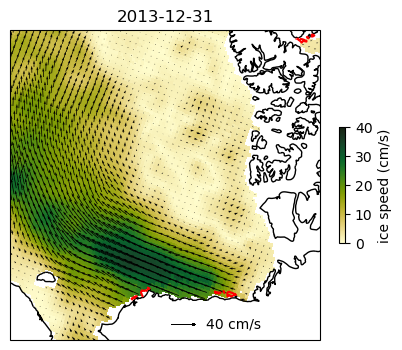

In [88]:
fig, ax = plt.subplots(figsize=(5,5), subplot_kw = {'projection': map_projection})
ax.coastlines()
ax.set_xlim(-1000000,1500000)
ax.set_ylim(-2500000,0)

# ice drift
# speed = np.sqrt(data['drift']['u']**2 + data['drift']['v']**2)
# mesh = ax.pcolormesh(data['drift']['xx0'], data['drift']['yy0'], 
#                      speed, vmin=0, vmax=40, cmap=cmocean.cm.speed, transform=data['drift']['proj'])
# plt.colorbar(mesh, label='ice speed (cm/s)', shrink =0.3)
# q = ax.quiver(data['drift']['xmid'], data['drift']['ymid'], data['drift']['u'], data['drift']['v'], 
#           scale_units='xy', scale=0.0002, transform=data['drift']['proj'])
# ax.quiverkey(q, X=0.6, Y=0.05, U=40, label='40 cm/s', labelpos='E', transform=ax.transAxes)

speed = np.sqrt(data['drift']['u']**2 + data['drift']['v']**2)
mesh = ax.pcolormesh(data['drift']['xx'], data['drift']['yy'], 
                     speed, vmin=0, vmax=40, cmap=cmocean.cm.speed, transform=data['drift']['proj'])
plt.colorbar(mesh, label='ice speed (cm/s)', shrink =0.3)
sp = 2
q = ax.quiver(data['drift']['xx'][::sp, ::sp], data['drift']['yy'][::sp, ::sp], data['drift']['u'][::sp, ::sp], data['drift']['v'][::sp, ::sp], 
          scale_units='xy', scale=0.0002, transform=data['drift']['proj'])
ax.quiverkey(q, X=0.6, Y=0.05, U=40, label='40 cm/s', labelpos='E', transform=ax.transAxes)

# sic
sp = 2
ax.contour(data['sic']['xx'][::sp,::sp], data['sic']['yy'][::sp,::sp], 
           data['sic']['sic'][::sp,::sp], levels = [10],
           colors = 'r', transform=data['sic']['proj'])

# MYI cover
# ax.contourf(data['myi']['xx'], data['myi']['yy'], data['myi']['MYI'], levels = [25,100],
#            colors = 'dodgerblue', alpha=0.3, transform=data['myi']['proj'])
# ax.contour(data['myi']['xx'], data['myi']['yy'], data['myi']['MYI'], levels = [25],
#            colors = 'dodgerblue', transform=data['myi']['proj'])
# ax.text(0.5,0.8,'MYI', size=25, c='dodgerblue', transform=ax.transAxes)

ax.set_title(date.strftime('%Y-%m-%d'))

fig.savefig('/Users/mackenziejewell/Desktop/img.png', dpi=300, bbox_inches='tight')

In [63]:
np.nanmax(data['sic']['sic'])

<Quantity(100.0, 'percent')>